## Python statistics essential training - 03_09_challenge

In [1]:
#meta 4/7/2020, 4/19/2020
#Ch3. Visualizing and Describing Data
#my code with solution code bits and extra towards data science resource
# src: Learn RegEx at https://docs.python.org/3/howto/regex.html
# src: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# src: https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
#import mailbox
import csv

# Personal Email Analytics
Challenge: plot the distribution by hour of my sent messages separately for each day and then overlay the plots for each day. 

## 0. Load Data

In [5]:
messages = pd.read_csv('lynda_data/mbox-cleaned.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
subject      1030 non-null object
from         1029 non-null object
to           1030 non-null object
date         1030 non-null object
dayofweek    1030 non-null object
timeofday    1030 non-null float64
nyear        1030 non-null float64
dtypes: float64(2), object(5)
memory usage: 56.4+ KB


In [6]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


## 1. Tidy Data
Convert the dates

In [7]:
#to datetime
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_localize('UTC').tz_convert('America/Los_Angeles'))

#to categorical
messages['dayofweek'] = pd.Categorical(messages['dayofweek'], 
        ordered = True,
        categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
subject      1030 non-null object
from         1029 non-null object
to           1030 non-null object
date         1030 non-null datetime64[ns, America/Los_Angeles]
dayofweek    1030 non-null category
timeofday    1030 non-null float64
nyear        1030 non-null float64
dtypes: category(1), datetime64[ns, America/Los_Angeles](1), float64(2), object(3)
memory usage: 49.7+ KB


In [8]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


## Challenge

## 2 Plot

### 2.0 Previously looked at distribution of messages by day of week.

Text(0.5,1,'Distribution of Messages by Day of the Week')

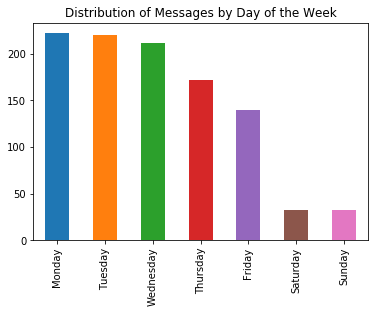

In [89]:
messages.dayofweek.value_counts(sort=False).plot(kind='bar')
plt.title("Distribution of Messages by Day of the Week")

### 2.1 Similarly, can look at distribution of messages by hour.

In [30]:
#hour
#time of day - get the hour and I add the minutes divided by 60
messages['hour'] = messages['date'].dt.hour.astype('category')
messages['hour'].tail()

messages['hour'].value_counts(sort=False)


0       4
1       8
2      13
3       2
4       4
5       3
6      10
7      21
8      40
9      76
10    156
11     80
12     85
13     50
14     70
15     80
16     76
17     57
18     59
19     22
20     11
21     58
22     35
23     10
Name: hour, dtype: int64

In [59]:
messages['timeofday'].value_counts(bins=24, sort=False)

(0.0919, 1.107]       4
(1.107, 2.097]       11
(2.097, 3.087]       10
(3.087, 4.078]        3
(4.078, 5.068]        4
(5.068, 6.058]        2
(6.058, 7.049]       11
(7.049, 8.039]       22
(8.039, 9.029]       40
(9.029, 10.019]      84
(10.019, 11.01]     148
(11.01, 12.0]        78
(12.0, 12.99]        85
(12.99, 13.981]      49
(13.981, 14.971]     71
(14.971, 15.961]     77
(15.961, 16.951]     76
(16.951, 17.942]     59
(17.942, 18.932]     57
(18.932, 19.922]     25
(19.922, 20.912]     11
(20.912, 21.903]     53
(21.903, 22.893]     39
(22.893, 23.883]     11
Name: timeofday, dtype: int64

Text(0.5,1,'Distribution of Messages by Hour')

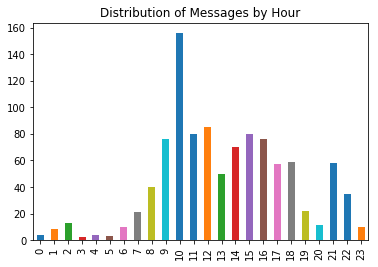

In [90]:
#plot
messages['hour'].value_counts(sort=False).plot(kind='bar')
plt.title("Distribution of Messages by Hour")

Text(0.5,1,'Histogram of Messages by Time of Day')

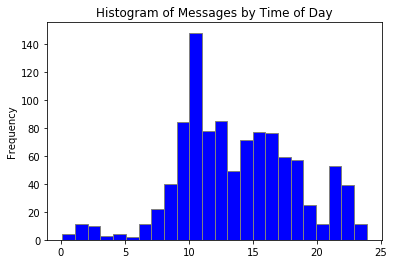

In [91]:
messages['timeofday'].plot(kind='hist', bins=24, color='blue', edgecolor='grey')
plt.title("Histogram of Messages by Time of Day")

Note: Categorical distributions are not exactly the same as Numerical histograms. 

Maybe Density plot?  Limit to possible hours only for readability.

Text(0.5,1,'Density of Messages by Time of Day')

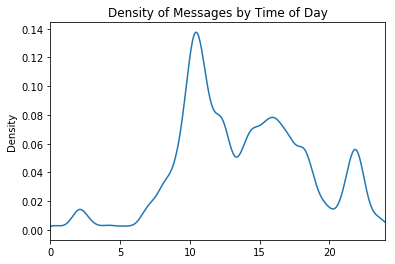

In [93]:
messages['timeofday'].plot(kind='density', bw_method=0.1)
plt.axis(xmin=0,xmax=24)
plt.title("Density of Messages by Time of Day")

Overlay Histogram and Density plots

Text(0.5,1,'Histogram and Density of Messages by Time of Day')

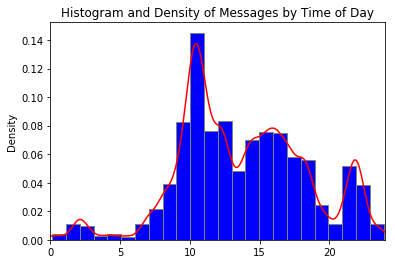

In [94]:
#overlay histogram and density plots 
messages['timeofday'].plot(kind='hist', bins=24, color='blue', edgecolor='grey', density=True)
#change bw_method to fit to every hour
messages['timeofday'].plot(kind='density', color='red', bw_method=0.1) #default bw_method='scott'
plt.axis(xmin=0,xmax=24)
plt.title("Histogram and Density of Messages by Time of Day")

Great but looking at days and hours separately doesn't address the question at hand.  Next, how best to combine by day of week + hour?

### 2.2 Combine Days of Week + Hours
#### 2.2.0 When Histograms fail.  
Based on article https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0  
https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb  

Loop over each day of the week and draw 7 histogram plots

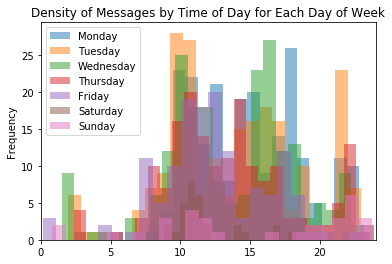

In [132]:
#loop over days of week
dow = messages['dayofweek'].cat.categories

#plot
for d in dow:
    messages[messages.dayofweek==d].timeofday.plot(kind='hist', bins=24, alpha = .5) #to fit exactly , bw_method=0.1

plt.title("Density of Messages by Time of Day for Each Day of Week")
plt.axis(xmin=0,xmax=24)
plt.legend(dow)


When we want to compare the distributions of one variable across multiple categories, histograms have issues with readability.

Density plots help with readibility. 2 ways to plot: 
- loop over each category  
- group by

#### 2.2.1 Loop over each day of the week and draw 7 density plots


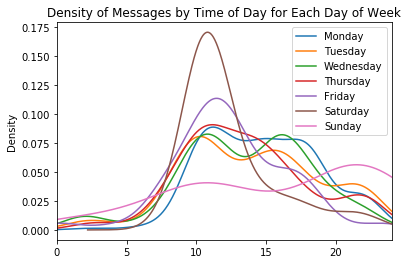

In [117]:
#loop over days of week
dow = messages['dayofweek'].cat.categories

#plot
for d in dow:
    messages[messages.dayofweek==d].timeofday.plot(kind='density') #to fit exactly , bw_method=0.1

plt.title("Density of Messages by Time of Day for Each Day of Week")
plt.axis(xmin=0,xmax=24)
plt.legend(dow)


#### 2.2.2 Group by

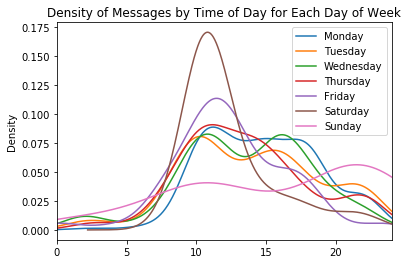

In [127]:
#no looping
messages.groupby('dayofweek').timeofday.plot(kind='density')

plt.title("Density of Messages by Time of Day for Each Day of Week")
plt.axis(xmin=0, xmax=24)
plt.legend(dow)

We see on Saturday have a bout of productivity in the morning and on Sunday after dinner send messages.  
End of solution.


## 3. My Closer Look
Misleading density chart - to an untrained eye, looks like most emails happen on Saturday. Want to look at total numbers day per day.  

Group Hours by Day of week (both categorical)

In [120]:
HoursByDayofweek = messages.groupby('dayofweek').hour.value_counts()
HoursByDayofweek[0:100:10]

dayofweek  hour
Monday     10      34
           13       9
Tuesday    9       25
           19       7
Wednesday  10      29
           13       6
           23       1
Thursday   21       8
           23       1
Friday     8        6
Name: hour, dtype: int64

In [121]:
#multiindex
HoursByDayofweek.index

MultiIndex(levels=[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [10, 12, 18, 14, 15, 17, 16, 21, 9, 11, 13, 22, 19, 8, 2, 5, 6, 7, 23, 10, 9, 21, 16, 14, 15, 8, 12, 17, 11, 13, 19, 22, 7, 18, 2, 1, 20, 23, 3, 4, 10, 16, 15, 11, 18, 9, 12, 8, 17, 21, 13, 14, 1, 19, 2, 6, 20, 22, 3, 5, 23, 10, 14, 11, 13, 9, 12, 17, 22, 15, 21, 8, 7, 16, 2, 18, 6, 19, 20, 5, 23, 12, 11, 10, 13, 9, 17, 7, 15, 18, 8, 16, 0, 14, 4, 23, 6, 20, 22, 10, 11, 9, 14, 16, 8, 12, 13, 18, 20, 22, 21, 10

In [122]:
HoursByDayofweek.unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Monday,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,3.0,11.0,...,22.0,20.0,12.0,17.0,26.0,6.0,NaN,12.0,9.0,1.0
Tuesday,NaN,2.0,4.0,1.0,1.0,NaN,NaN,5.0,11.0,25.0,...,18.0,18.0,21.0,9.0,5.0,7.0,2.0,24.0,7.0,2.0
Wednesday,NaN,5.0,4.0,1.0,NaN,1.0,4.0,NaN,10.0,14.0,...,6.0,25.0,28.0,9.0,15.0,5.0,3.0,9.0,3.0,1.0
Thursday,NaN,NaN,4.0,NaN,NaN,1.0,3.0,6.0,7.0,12.0,...,19.0,9.0,6.0,11.0,4.0,2.0,2.0,8.0,10.0,1.0
Friday,3.0,NaN,NaN,NaN,2.0,NaN,1.0,9.0,6.0,11.0,...,3.0,8.0,6.0,11.0,7.0,NaN,1.0,NaN,1.0,2.0
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,2.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
Sunday,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,2.0,1.0,...,NaN,NaN,1.0,NaN,1.0,2.0,2.0,5.0,4.0,3.0


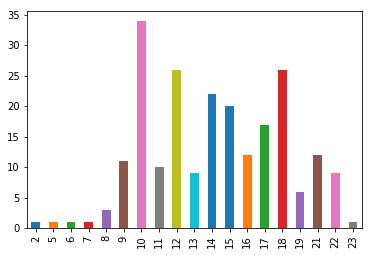

In [128]:
#confirm Monday messages by hour
messages[messages.dayofweek=='Monday']['date'].dt.hour.value_counts(sort=False).plot(kind='bar')


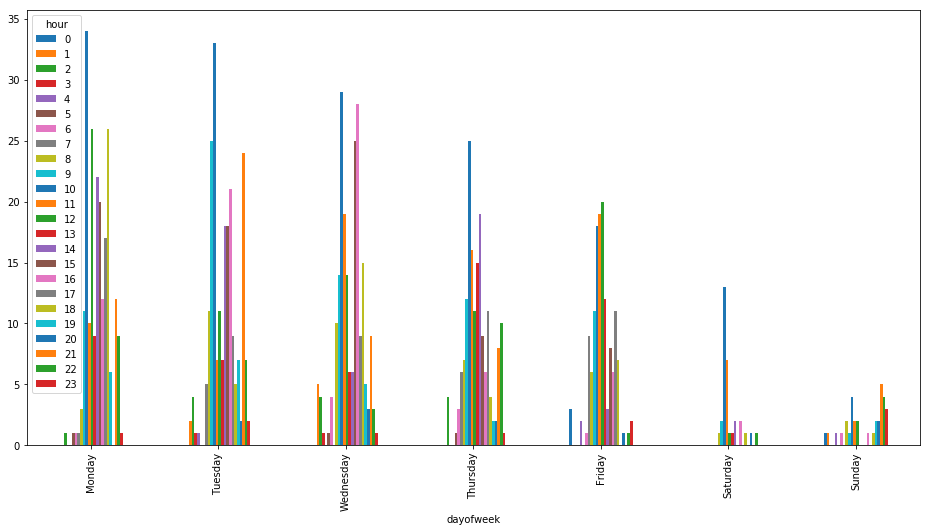

In [126]:
HoursByDayofweek.unstack().fillna(0).plot(kind='bar', figsize=(16,8))

This supplemental plot explains Saturday and Sunday messaging pattern better.  Each day Density plot is relative to that day only.

#### It's important to know how to read different kinds of plot.  Supplemental plots provide a better overall picture.